# Análisis de una señal LoRa PHY. Inmunidad de LoRa ante el ruido gaussiano y Efecto Doppler. Análisis del caso de un Satélite en órbita.
## Facultad de Ciencias Exactas, Físicas y Naturales - Universidad Nacional de Córdoba.

## Integrantes:
* Pary Joaquin
* Colque Santiago
* Pave Aldana

## Profesores:
* Dra. Graciela Corral Briones.
* Ing. Martin Ayarde.

## Comunicaciones Digitales 2023.

# Resumen.

Este trabajo de investigación estudia la robustez de la modulación LoRa ante el ruido gaussiano y efecto doppler. La recepción de los paquetes se realizaron con un dispositivo IoT (Pycom FiPy) y tanto el envío de paquetes como las alteraciones del canal de transmisión mediante una SDR (ADALM-PLUTO).

# Introducción.

La modulación LoRa (Long Range) es un tipo de LPWAN (Low Power Wide Area Network) que se caracteriza por su gran rango y bajo consumo, lo que la hace excelente para aplicaciones en el área de Internet of Things (IoT).
LoRa representa la capa física del sistema LoRaWAN cuya especificación es mantenida por Lora Alliance.
LoRa se basa en la técnica de Chirp Spread Spectrum. Un chirp es una señal compleja, generada en banda base. Cuando la derivada de la variación en frecuencia es positiva es un up-chirp y si es negativa, un down-chirp.

<div style="text-align: center;">
    <img src="img/up-down_chirp.png" alt="UpDown Chirp" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 1: Up-Chirp y Down-Chirp.</figcaption>
</div>

# Símbolos LoRa.

Inicialmente, la información generada por la capa MAC es dividida en subsecuencias, cada una de longitud $SF\epsilon[7...12]$ (Spreading Factor). El número de símbolos posibles es igual a

$$M=2SF,$$

y la duración de un símbolo está dada por:

$$Ts=\frac{M}{B}$$ 

Siendo   

$$B=Bandwidth.$$

Entonces la representación de la señal compleja es la siguiente:

$$S_l(t)=e^{j2f_c(t)t},$$ 
con 
$$fc(t)= \pm \frac{B}{T_s}t,$$    
para  
$$t\epsilon[-Ts2,Ts2]$$

<div style="text-align: center;">
    <img src="img/funcion_en_frecuencia.png" alt="LoRa Funcion en Frecuencia" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 2: Funcion de frecuencia f(t).</figcaption>
</div>

# Paquete LoRa.

<div style="text-align: center;">
    <img src="img/lora_frame.png" alt="Lora Frame" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 3. Paquete LoRa junto a las partes que lo componen.</figcaption>
</div>

La estructura de un paquete LoRa PHY está constituida por:
* Preámbulo: permite la sincronización entre el receptor y transmisor, consiste en símbolos iguales.

* Sincronización de Frame (Frame Sync): permite al receptor alinearse con el inicio del paquete de datos después del preámbulo, esto garantiza que el receptor esté correctamente sincronizado con la estructura de la trama.

* Sincronización de Frecuencia (Freq Sync): permite al receptor ajustar su frecuencia, ayudando a corregir cualquier desplazamiento de frecuencia que pueda haber ocurrido.

* Header: contiene información sobre el paquete transmitido.

* Payload: aquí se encuentran los datos a transmitir.


# Objetivos.

* Implementación de Transmisión LoRa mediante SDR y recepción de Señales LoRa con Dispositivo IoT: Pycom (FiPy).

* Modificación del Canal de Transmisión con Ruido Gaussiano.

* Análisis del Efecto Doppler en Condiciones Estáticas.

* Estudio del Efecto Doppler en un Satélite en Órbita.


# Parámetros de configuración.

### SDR
* $Sampling Rate = 2[MHz].$
* $Carrier Frequency= 915[MHz].$
* $Bandwidth = 125[KHz].$
* $Attenuation = -35.$

### PYCOM (FiPy).

* $Band = AU915.$
* $Bandwidth =125[KHz].$
* $Spreading Factor = 8.$
* $Preamble = 8.$
* $Coding Rate = 4:5.$

# Entorno físico utilizado.
Distancia entre la FiPy y la SDR= 3 [m].

<div style="text-align: center;">
    <img src="img/entorno_fisico.png" alt="Entorno Fisico" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 4. Entorno fisico de trabajo.</figcaption>
</div>

# Desarrollo.

## Creación un paquete LoRa.

Se implementó una función en Python para generar chirps en base a los parámetros establecidos en la configuración del dispositivo Pycom, para este caso:
* $Bandwidth: 125 [KHz].$
* $SF = 8.$

<div style="text-align: center;">
    <img src="img/lora_simbolo.png" alt="Creacion de un simbolo LoRa" style="max-width: 1000px height: auto">
    <figcaption>Imagen 5. Simbolo LoRa, S = 125.</figcaption>
</div>

En la Imagen 5 se muestra un símbolo LoRa generado con un valor de 125. De igual manera se generaron el resto de los símbolos que constituyen cada paquete.
En un espectrograma un paquete generado por el código desarrollado se ve de la siguiente manera:

<div style="text-align: center;">
    <img src="img/lora_paquete.png" alt="Creacion de un paquete LoRa" style="max-width: 1000px height: auto">
    <figcaption>Imagen 6. Espectrograma del paquete LoRa creado.</figcaption>
</div>

En la Imagen 6 se pueden apreciar las secciones descritas en la Introducción.

## Análisis Sobre Resistencia LoRa.

Al transmitir una señal LoRa con la SDR para recibirla con la Pycom FiPy, no fue posible para el grupo de trabajo establecer la conexión, por lo que luego de múltiples intentos y ajustes, se tomó la decisión de utilizar una señal generada por la FiPy, por lo que se recibió una muestra con la SDR, siendo la señal enviada desde el dispositivo IoT. Esta muestra, generada con las configuraciones mencionadas previamente, fue almacenada para luego ser transmitida nuevamente desde la SDR hacia el dispositivo FiPy. Como el objetivo principal del trabajo fue analizar las capacidades de LoRa para soportar ruido gaussiano y efecto Doppler, se decidió que el método satisfacía las necesidades del grupo ya que el enfoque debía centrarse en analizar la transmisión de la señal y no en cómo se obtiene la misma.

En consecuencia, todas las pruebas subsiguientes se llevaron a cabo utilizando la muestra captada por la SDR y no la generada anteriormente. Esta decisión provocó que todas las pruebas se realizaran utilizando la misma señal, es decir que todos los paquetes enviados fueran iguales y en consecuencia tuvieran menos variabilidad.
En la Imagen 7 se observa la señal utilizada en el trabajo de laboratorio, así como las partes que la componen.


<div style="text-align: center;">
    <img src="img/lora_paquete_2.png" alt="Recepcion de un paquete LoRa" style="max-width: 1000px height: auto">
    <figcaption>Imagen 7. Paquete LoRa FiPy.</figcaption>
</div>

In [24]:
#------------------------------- SDR Lib -------------------------------
import adi

In [1]:
#------------------------------- Libraries -----------------------------
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import time
import random
from scipy.signal import spectrogram

In [2]:
# SDR Parameters
sample_rate = 2e6
buffer_size = 2**20

# Operating Parameters
mode = 0                    # 0 = AWGN, 1 = Doppler, 2 = Doppler Satelite

In [ ]:
#------------------------------- SDR Setup -------------------------------
sdr             = adi.Pluto("ip:192.168.1.31")      # SDR IP
sdr.sample_rate = sample_rate                               # Sample Rate RX and TX
sdr.loopback    = 0                                 # 0=Disabled, 1=Digital, 2=RF
#Tx:
sdr.tx_lo                 = int(915e6)              # TX Carrier frequency
sdr.tx_hardwaregain_chan0 = -35                     # Attenuation applied to TX path, valid range is -90 to 0 dB [dB]
sdr.tx_rf_bandwidth       = int(125e3)              # Bandwidth of front-end analog filter of TX path [Hz]
sdr.tx_cyclic_buffer      = False
# Rx:
sdr.rx_lo                   = int(915e6)            # RX Carrier frequency
sdr.gain_control_mode_chan0 = "fast_attack"         # Receive path AGC Options: slow_attack, fast_attack, manual
sdr.rx_rf_bandwidth         = int(125e3)            # Bandwidth of front-end analog filter of RX path [Hz]
sdr.rx_cyclic_buffer        = False
sdr.rx_buffer_size          = buffer_size          

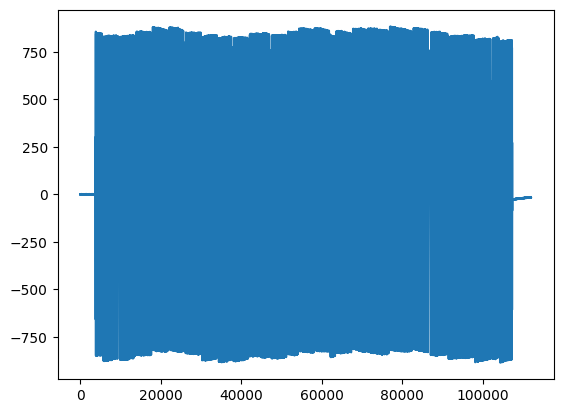

In [3]:
# Load the signal data from the binary file
rxSignal = np.load('short_signal_data.npy')
plt.plot(np.real(rxSignal))

In [4]:
# Generates a spectrogram plot for a given signal
def plotspectrogram(title, rxSignal_reconstruida, samples, axis_min):
    plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
    ff, tt, Sxx = spectrogram(rxSignal_reconstruida , fs =samples, nperseg=512, noverlap=512/2, mode='psd', return_onesided= False)
    plt.pcolormesh(tt, ff, (Sxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frequency')
    plt.colorbar(label='Potencia (dB)')
    plt.axis(ymax = 0)
    plt.axis(ymin= -axis_min)
    plt.grid(alpha=0.4)
    x_min, x_max, _, _ = plt.axis()
    plt.xticks(np.arange(x_min, x_max, x_max/44))
    plt.show()

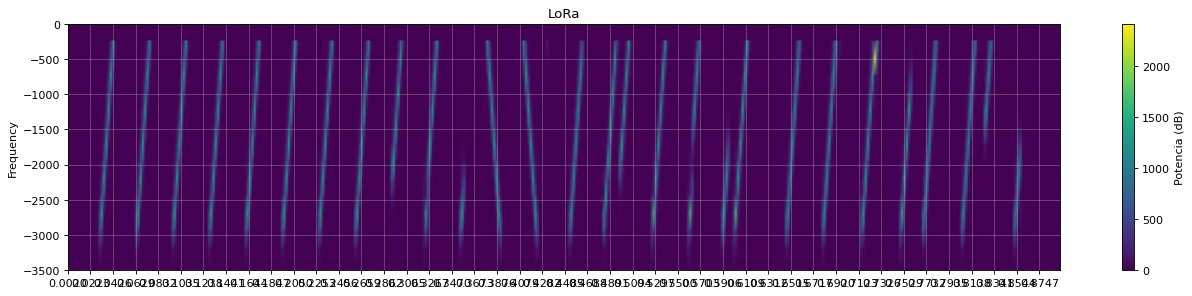

In [5]:
plotspectrogram("LoRa", (rxSignal), 125e3, 3500)

## Análisis de LoRa bajo Ruido Gaussiano (Canal AWGN).
Para modificar una señal muestreada añadiendo ruido gaussiano ajustado a una SNR deseada, Primero se calcula la potencia de la señal muestreada utilizando la varianza de la señal:

$$P_{signal} = 2 = \frac{1}{N} \sum_{n=1}^{N} (s[n] - 𝛍)$$

Luego se calculó la potencia del ruido a partir de la potencia de la señal y la SNR, especifica por nosotros en decibelios (dB) pero trabajada para tratarla linealmente:
$$SNR_{linear} = 10^{\left(\frac{SNR_{dB}}{10}\right)}$$

$$P_{noise} = \frac{P_{signal}}{SNR}$$

A continuación, se genera ruido gaussiano, señal compleja con componentes real e imaginaria aleatoria, cada una con una varianza igual a la mitad de la varianza del ruido calculada anteriormente.

$$N_{real} = N_{imag} = \sigma^2 = \frac{P_{noise}}{2}$$

$$noise = N_{real} + N_{imag}$$


In [6]:
def add_awgn_noise(signal, snr):
    # Calculate Signal Power
    signal_power = np.var(signal)
    print("Signal power:", signal_power)

    # The noise power is calculated, taking into account signal power and SNR
    noise_power = signal_power/snr

    # Generate AWGN 
    noise_imag = np.sqrt(noise_power/2)*np.random.randn(len(signal))
    noise_real = np.sqrt(noise_power/2)*np.random.randn(len(signal))
    
    # Add Signal with Noise Signal
    noisy_signal = signal + (noise_real + 1j * noise_imag)
    
    print("Noise Power:", np.var(1j * noise_imag + noise_real))
    print("Noisy Signal Power: ", np.var(noisy_signal))
    print("SNR: ", np.var(signal)/np.var(1j * noise_imag + noise_real))
    print("Mean of the Signal:", np.mean(signal))
    
    return noisy_signal

Se estudiaron luego 18 niveles de SNR, enviando 10000 muestras para cada uno, de forma que se obtuvieron los siguientes resultados:
<div style="text-align: center;">
    <img src="img/tabla_awgn.png" alt="Tabla AWGN" style="max-width: 1000px height: auto;">
</div>

Estos datos se observan de mejor manera en un gráfico como el siguiente:

<div style="text-align: center;">
    <img src="img/grafico_awgn.png" alt="Grafico AWGN" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 8. Tasa de error en la recepcion de paquetes con un canal AWGN.</figcaption>
</div>

Es notorio como la eficacia de LoRa va decreciendo conforme la relación señal ruido se torna más negativa.


## Análisis del Efecto Doppler simplificado.
Se realizó una simulación de efecto Doppler instantáneo, para esto se creó un Offset implementado mediante una señal compleja exponencial que al multiplicarla con la señal original la desplaza en frecuencia. La señal de offset se expresa como: 
$$SignalOffset=e^{j2\pi f_{offset} t}$$
Siendo $f_{offset}$ el offset en frecuencia a utilizar, resultando la nueva señal como:
$$SignalDoppler=Singal*SignalOffset$$
Tomando en cuenta que el $SF = 8$ y el $AnchodeBanda=125[KHz]$:
$$SymbolPeriod=\frac{2^{SF}}{B}=2.048[ms]$$
Entonces:
$$SymbolFrec=\frac{1}{SymbolPeriod}=488.28[Hz] \approx 500[Hz]$$
Tomando como punto de partida un desfase correspondiente a la mitad de la frecuencia de un símbolo, es decir $250[Hz]$, y aumentando progresivamente hasta $50 [KHz]$.

In [7]:
# Generate a exponential complex signal offset 
def generate_complex_exp(rx_signal, sampling_rate, frequency_off_set, duration):
    # Calculation of the number of samples in the signal
    num_samples = len(rx_signal)
    
    # Generate time vector
    time_vector = np.arange(num_samples) / sampling_rate
    
    # Calculation of instantaneous frequency
    instantaneous_frequency = 2 * np.pi * frequency_off_set * time_vector
    
    # Calculation complex exponential
    complex_exponential = np.exp(1j * instantaneous_frequency)
    
    return complex_exponential


Se obtuvieron los siguientes resultados:

<div style="text-align: center;">
    <img src="img/tabla_doppler.png" alt="Tabla Doppler" style="max-width: 1000px height: auto;">
</div>


<div style="text-align: center;">
    <img src="img/grafico_doppler.png" alt="Grafico Doppler" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 9. Tasa de Error.</figcaption>
</div>

Se puede observar en la tabla y en el gráfico que la Tasa de Error aumentó significativamente entre los $30[KHz]$ y los $32.5[KHz]$.

## Estudio del Efecto Doppler para un Satélite en Órbita.

El uso de LoRa para comunicar un satélite que se encuentra orbitando nuestro planeta y una estación en tierra es de gran interés. Esto se debe a la poca potencia requerida y la robustez de la comunicación.
Se analizó la situación teniendo en cuenta que:
* El satélite orbita a 200 km de la superficie donde se ubica el receptor.
* El satélite se encuentra en una órbita circular alrededor de nuestro planeta, por lo que su velocidad es constante.
* El punto de mayor interés se encuentra cuando el satélite se acerca a su posición cenital con respecto al receptor, ya que la velocidad relativa es mayor. Se analizó una ventana de tiempo de 5 minutos, los 2.5 minutos anteriores y los 2.5 siguientes al instante correspondiente a la posición cenital.


En la imagen 10 se aprecia de manera simplificada el caso analizado, destacando las posiciones correspondientes al instante inicial, el instante final y la posición cenital del satélite.

<div style="text-align: center;">
    <img src="img/satelit.png" alt="Satelit" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 10. Satelite en una orbita a 200[Km].</figcaption>
</div>

Para ajustar la señal con el Doppler Shift correspondiente a cada instante de tiempo se calculó la variación de la velocidad relativa entre el transmisor y el receptor. Como se trabajó con una ventana de tiempo de 5 minutos, la cantidad de paquetes a enviar es 5357.

Esto se explica ya que el tiempo que consume cada símbolo es de $0.002046[Seg]$:

$$SymbolTime=\frac{2^{SF}}{Bandwitdh}=\frac{256}{125000}=0.002048[Seg]$$

Debido a que la señal a transmitir se compone de 25 símbolos en total, se tiene que:

$$PacketTime=SymbolTime * 25=0.0512[Seg].$$

Esto implica que en 5 minutos se envían 5357 paquetes completos.
Consecuentemente se generaron 5357 señales exponenciales complejas, siguiendo la siguiente expresión:

$$SignalOffset=e^{j2\pi f_{offset}t}$$

Siendo $f_{offset}$ el valor correspondiente al efecto Doppler en cada instante de tiempo.

Esto se calcula tomando en cuenta:
* $H = 200000 [m].$ Es la altura a la que orbita el satélite.
* $g = 9.81 [ m / s2 ].$ Es la aceleración debida a la gravedad.
* $R = 6371000 [m].$ Es el radio de la tierra.
* $c = 299792458 [m/s].$ Es la velocidad de la luz.

La frecuencia de offset entonces se calcula como:

$$f_{offset}=\frac{1}{{1+\frac{1}{c}}{\sqrt{\frac{gR}{1+\frac{H}{R}}}}{\frac{\sin{\varphi}}{\sqrt{{(1+\frac{H}{R})^2}-2{(1+\frac{H}{R})}\cos{\varphi}+1}}}}-1$$

Donde lo único que varía de un instante a otro y por ende de una posición a otra es el ángulo $\varphi$, expresado como:

$$\varphi=\frac{\sqrt{\frac{g}{R}}}{(1+\frac{H}{R})^{\frac{3}{2}}}t$$

Por consecuencia, el único factor variable es el instante de tiempo $t$.

Utilizando la expresión de la frecuencia de offset se calcularon los desfases correspondientes a cada instante de tiempo. Posteriormente, se generaron las exponenciales complejas de modo que, al multiplicarlas por la señal original, se incorpora en ella el efecto Doppler.

In [8]:
# Calculate the Doppler shift
def calc_doppler_shift(t):
    
    H = 200000
    g = 9.81
    R = 6371000
    c = 299792458
    aux_1HR = 1 + (H/R) 
    phi = (np.sqrt(g / R) / (aux_1HR)**(3/2) ) * t
    v = np.sqrt((g * R) / aux_1HR)
    aux_sqrt = np.sqrt((aux_1HR)**2 - 2 * aux_1HR * np.cos(phi) + 1 )
    doppler_shift = 1 / (1 + (1/c) * v * ( np.sin(phi) / aux_sqrt )) - 1   
    doppler_shift = doppler_shift*915000000
    
    return doppler_shift


<div style="text-align: center;">
    <img src="img/frecuencia_tiempo.png" alt="Frecuecian en funcion del tiempo" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 11. Efecto Doppler aplicado a la señal original.</figcaption>
</div>

En la imagen 11 se muestra el efecto Doppler (y por ende el Doppler Shift) que afecta a cada uno de los 5357 paquetes enviados.

Al realizar las pruebas se obtuvieron los siguentes resultados:

<div style="text-align: center;">
    <img src="img/tabla_doppler_satelite.png" alt="Tabla Doppler Satelite" style="max-width: 1000px height: auto;">
</div>

En la última fila se calcula un promedio para los datos obtenidos. Con estos valores se elaboró el gráfico disponible en la imagen 11

Se debe notar que el gráfico se encuentra recortado para poder apreciar de una mejor manera los paquetes perdidos y los recibidos con error, ya que aunque la escala vertical tiene como límite 50, la suma de paquetes recibidos de manera correcta asciende a 5334, lo que comprende el 99.5% de los paquetes enviados.


<div style="text-align: center;">
    <img src="img/grafico_doppler_satelite.png" alt="Grafico Doppler Satelite" style="max-width: 1000px height: auto;">
    <figcaption>Imagen 12. Resultado de la transmision y recepcion de paquetes bajjo efecto Doppler.</figcaption>
</div>

Signal power: 651201.5600246409
Noise Power: 32587228.676277425
Noisy Signal Power:  33263590.19035378
SNR:  0.019983336616123393
Mean of the Signal: (1.1399732142857144+1.0935357142857143j)


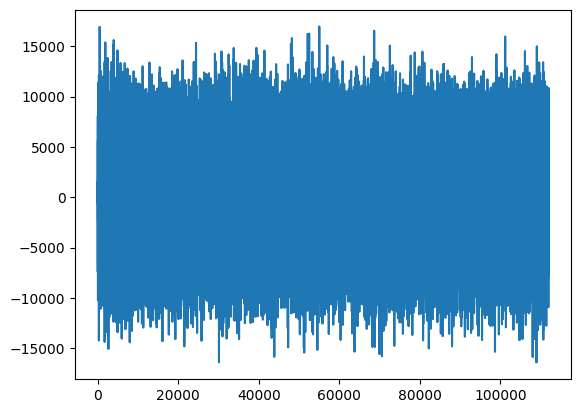

In [9]:
if mode == 0:
    # AWGN

    # Set the SNR in dB
    snr_in_db = -17
    # Convert SNR to linear scale
    snr_linear = 10**(snr_in_db/10)
    # Add AWGN noise to the signal
    noisy_signal = add_awgn_noise(rxSignal, snr_linear)

    plt.plot(np.real(noisy_signal))
    plt.show()

elif mode == 1:
    # Doppler

    # Calculate the sample time
    sample_time = buffer_size / sample_rate
    # Set the frequency offset
    frequency_off_set = 32500  # Hz
    # Generate the complex exponential
    exponential = generate_complex_exp(rxSignal, 2e6, frequency_off_set, sample_time)

    # Application of the complex exponential to the signal
    modified_signal = rxSignal * exponential

    plotspectrogram("Signal LoRa * exp", (modified_signal), 125e3, 2000)

elif mode == 2:
    # Doppler Satelit

    # Calculate the sample time
    sample_time = buffer_size / sample_rate
    # Calculate packet time
    packet_time = len(rxSignal) / sample_rate

    time_vector = np.linspace(-150, 150, int(300/packet_time))

    exp_vector = []
    freq_vector = []

    # Generate vector of complex exponentials
    for t in time_vector:
        frequency_doppler = calc_doppler_shift(t)
        freq_vector.append(frequency_doppler)
        exp_vector.append(generate_complex_exp(rxSignal, sample_rate, frequency_doppler, sample_time))
    
    plt.plot(freq_vector)

In [ ]:
txSignal = modified_signal/ max(modified_signal) * 2**14
plt.plot(np.real(txSignal))

if mode == 2:
    print("Start transmission")
    for exp in exp_vector:
        modified_signal = rxSignal * exp
        txSignal = modified_signal/ max(modified_signal) * 2**14
        sdr.tx(txSignal)
    print("End transmission")
else:
    i=0
    print("Start transmission")
    while(i<1000):
        sdr.tx(txSignal)
        i = i+1
    print(i)
    i=0
    while(i<1000):
        sdr.tx(txSignal)
        i = i+1
    print(i*2)
    i=0
    while(i<1000):
        sdr.tx(txSignal)
        i = i+1
    print(i*3)
    i=0
    while(i<1000):
        sdr.tx(txSignal)
        i = i+1
    print(i*4)
    i=0
    while(i<1000):
        sdr.tx(txSignal)
        i = i+1
    print(i*5)
    print("End transmission")

# Conclusiones
A partir del estudio y los experimentos realizados, se concluye que:

* Debido a que la patente de LoRa es propiedad de Semtech, se trata de una tecnología Closed Source, lo que implica que se desconoce el detalle de cómo está implementado. Se considera que la poca información disponible y la complejidad del protocolo son la principal razón por la cual no fue posible recibir ningún tipo de paquete manufacturado por los integrantes del equipo.

* Los resultados obtenidos del análisis sobre ruido gaussiano son congruentes a los obtenidos por Ferré G. y Giremus A. en su estudio LoRa Physical Layer Principle and Performance Analysis.

* En el análisis sobre efecto Doppler se muestra que la tasa de error fue relativamente baja al introducir un desplazamiento en frecuencia de $30 [KHz]$, siendo esta menor al 0.5%. A partir de este punto, el aumento en la cantidad de errores fue exageradamente significativo, tomando valores muy cercanos al 100% de tasa de error.

* Es relevante observar que el Doppler Shift máximo para el satélite se encuentra por debajo de los $30 [KHz]$, lo que refuerza los resultados anteriores.Tanto en el estudio del efecto Doppler simplificado, como en el del caso del satélite, se puede notar que la robustez de LoRa frente a errores inducidos por variaciones en la frecuencia es formidable, siendo ambos análisis convergentes en sus conclusiones, y posicionando al protocolo LoRa como un gran candidato para este tipo de necesidades.

* Los resultados obtenidos por el estudio del satélite también concuerdan con los obtenidos en el trabajo de investigación Experimental Study of LoRa Modulation Immunity to Doppler Effect in CubeSat Radio Communications.

* A lo largo de los tres experimentos, se distinguió entre paquetes perdidos (que nunca fueron recibidos) y paquetes que la FiPy recibió pero presentaban errores (la información recibida era diferente a la enviada).
Si se analiza esta información, se tiene que existe una tendencia muy marcada en la que los paquetes perdidos son considerablemente más frecuentes que los paquetes con error. Esto tiene una posible explicación en que LoRa implementa Forward Error Correction en su trama, lo que le permite detectar errores y corregirlos antes de ponerlos a disposición del usuario.


# Bibliografía.
* What is LoRa: The fundamentals. It is not a protocol. Not an audio… | by Vit Prajzler | Medium.
https://medium.com/@prajzler/what-is-lora-the-fundamentals-79a5bb3e6dec

* Reversing LoRa - Matt Knight Bastille Networks.
https://static1.squarespace.com/static/54cecce7e4b054df1848b5f9/t/57489e6e07eaa0105215dc6c/1464376943218/Reversing-Lora-Knight.pdf

* Reverse Engineering LoRa’s PHY.
https://www.alchemistowl.org/pocorgtfo/pocorgtfo13.pdf

* From Demodulation to Decoding: Toward Complete LoRa PHY Understanding and Implementation | ACM Transactions on Sensor Networks. 
https://dl.acm.org/doi/10.1145/3546869#d1e1173

* LoRa Physical Layer Principle and Performance Analysis - Ferré G.y Giremus A., Dec 2018.
https://hal.science/hal-01977497/document

* Experimental Study of LoRa Modulation Immunity to Doppler Effect in CubeSat Radio Communications - Alexander A. Doroshkin, Alexander M. Zadorozhny, Oleg N. KusVitaliy, Yu. Prokopyev, Yuri M. Prokopyev.
https://ieeexplore.ieee.org/document/8723123


In [22]:
#Since it is not possible to turn off Tx, it is configured to transmit at low power and on a different frequency than Rx.
sdr.tx_destroy_buffer()
TxAtten  = -90
RxLOFreq = 2400e6
# sdr.tx(np.zeros(2048))

In [ ]:
# Destroy radio object
del(sdr)